# Digits Classification

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Datasets
from sklearn.datasets import load_digits

# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

# To deal with warnings 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
def getStats(data, yTest, yPred):
    print('Accuracy:', accuracy_score(yTest, yPred))
    print('Macro-F1:', f1_score(yTest, yPred, average = 'macro'))
    print('Confusion Matrix:\n')
    m = confusion_matrix(yTest, yPred)
    m = m.transpose()
    m = np.round(100 * m / np.sum(m, axis = 0), 0).transpose()
    return pandas.DataFrame(m, index = data.target_names, columns = data.target_names)

## First Experiment

### Randomly divide the data into training (70%) and testing (30%) sets

In [3]:
data = load_digits()
x, y = load_digits(return_X_y = True)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0) #Random-state is the seed
print('X:', x.shape, 'Y:', len(y))
print('xTrain:', xTrain.shape, 'yTrain:', len(yTrain))
print('xTest:', xTest.shape, 'yTest:', len(yTest))
#print('yTest:', yTest)

X: (1797, 64) Y: 1797
xTrain: (1257, 64) yTrain: 1257
xTest: (540, 64) yTest: 540


### Generate three classification models: 

#### [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [4]:
model = GaussianNB()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

##### Print:

- Accuracy
- Macro-F1
- Confusion matrix

In [5]:
getStats(data, yTest, yPred)

Accuracy: 0.8240740740740741
Macro-F1: 0.8241827842292786
Confusion Matrix:



,0,1,2,3,4,5,6,7,8,9
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
2,0.0,11.0,49.0,9.0,0.0,0.0,0.0,0.0,30.0,0.0
3,0.0,0.0,0.0,85.0,0.0,0.0,0.0,2.0,11.0,2.0
4,0.0,6.0,0.0,0.0,75.0,0.0,4.0,15.0,0.0,0.0
5,0.0,2.0,0.0,4.0,0.0,89.0,2.0,4.0,0.0,0.0
6,0.0,0.0,2.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,2.0,0.0,0.0,98.0,0.0,0.0
8,0.0,8.0,0.0,5.0,0.0,2.0,0.0,2.0,84.0,0.0
9,0.0,2.0,0.0,25.0,2.0,0.0,0.0,5.0,9.0,58.0


#### [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [6]:
model = LogisticRegression(random_state=0, max_iter=3500)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

##### Print:

- Accuracy
- Macro-F1
- Confusion matrix

In [7]:
getStats(data, yTest, yPred)

Accuracy: 0.9555555555555556
Macro-F1: 0.9570516755557739
Confusion Matrix:



,0,1,2,3,4,5,6,7,8,9
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,92.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0
2,0.0,2.0,94.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,98.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,95.0,2.0,0.0,0.0,4.0
6,0.0,2.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0
7,0.0,0.0,0.0,2.0,2.0,0.0,0.0,96.0,0.0,0.0
8,0.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,89.0,5.0
9,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,96.0


#### [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [8]:
model = DecisionTreeClassifier(random_state=0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

##### Print:

- Accuracy
- Macro-F1
- Confusion matrix

In [9]:
getStats(data, yTest, yPred)

Accuracy: 0.8574074074074074
Macro-F1: 0.8591807712816509
Confusion Matrix:



,0,1,2,3,4,5,6,7,8,9
0,93.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
1,0.0,87.0,0.0,0.0,4.0,0.0,4.0,2.0,2.0,2.0
2,2.0,0.0,81.0,6.0,2.0,0.0,0.0,0.0,4.0,6.0
3,0.0,0.0,4.0,83.0,0.0,2.0,4.0,0.0,7.0,0.0
4,2.0,0.0,0.0,0.0,90.0,0.0,4.0,0.0,4.0,0.0
5,0.0,0.0,2.0,2.0,2.0,89.0,0.0,0.0,0.0,5.0
6,0.0,3.0,2.0,0.0,5.0,0.0,90.0,0.0,0.0,0.0
7,2.0,2.0,0.0,0.0,0.0,0.0,0.0,92.0,2.0,2.0
8,5.0,5.0,3.0,7.0,0.0,0.0,0.0,3.0,70.0,7.0
9,0.0,0.0,2.0,5.0,0.0,4.0,0.0,2.0,4.0,84.0


## Second Experiment


### Randomly divide the data into 30 splits using [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).



In [10]:
kf = KFold(n_splits = 30, random_state = 0, shuffle = True)

### For each iteration

#### Create three models: 
- Naive Bayes

- Logistic Regression 

- Decision Tree.

#### Calculate and save for each model the macro-F1

In [11]:
resultsB, resultsL, resultsD = [], [], []
for trainI, testI in kf.split(x):
    xTrain, yTrain = x[trainI, :], y[trainI]
    xTest, yTest = x[testI, :], y[testI]
    
    modelB = GaussianNB()
    modelB.fit(xTrain, yTrain)
    yPredB = modelB.predict(xTest)
    resultsB.append(f1_score(yTest, yPredB, average = 'macro'))

    modelL = LogisticRegression(random_state=0)
    modelL.fit(xTrain, yTrain)
    yPredL = modelL.predict(xTest)
    resultsL.append(f1_score(yTest, yPredL, average = 'macro'))

    modelD = DecisionTreeClassifier(random_state=0)
    modelD.fit(xTrain, yTrain)
    yPredD = modelD.predict(xTest)
    resultsD.append(f1_score(yTest, yPredD, average = 'macro'))    


## Generate a visualization

With three boxplots (each one per type of model) showing the values of macro-F1.

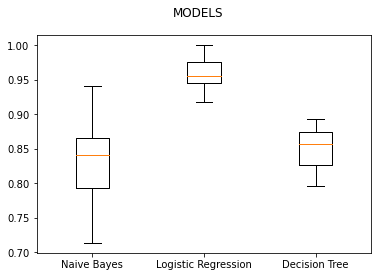

In [12]:
plt.figure()
plt.suptitle('MODELS')
plt.boxplot([resultsB, resultsL, resultsD], labels = ['Naive Bayes', 'Logistic Regression', 'Decision Tree'])
plt.show()

# Conclusion

**Finally, write a small paragraph analyzing the results describing which one is the best model for this kind of data.**

> When comparing the models, it's possible to see thanks to the boxplot that the Naive Bayes model is unstable compared to the others, because it has a bigger range of variation in its results.

> On the other hand, the Logistic Regression presented much more stability and better results by far, but it's important to consider that changing the number of iterations was necessary to avoid the ConvergenceWarning, taking them from 100 (default value) to 3500.